## Creating Animated Charts in Python

In [2]:
import os
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import imageio
import random

In [3]:
df = pd.read_csv('../data/players_21.csv')

In [4]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [5]:
leagues = ['English Premier League', 'Spain Primera Division', 'Italian Serie A' ,'German 1. Bundesliga', 'French Ligue 1']
df = df[df['league_name'].isin(leagues)]

In [6]:
df['dob']= pd.to_datetime(df['dob'])
df['year'] = pd.DatetimeIndex(df['dob']).year
df['month'] = pd.DatetimeIndex(df['dob']).month
df['month_name'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df['day'] = pd.DatetimeIndex(df['dob']).day
df['dayofweek'] = pd.DatetimeIndex(df['dob']).weekday

<AxesSubplot:>

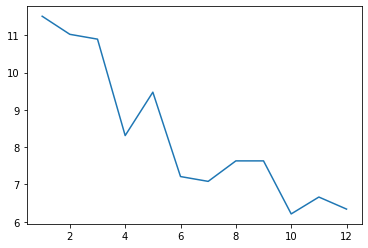

In [7]:
(df['month'].value_counts(normalize=True)*100).sort_index().plot()

<AxesSubplot:>

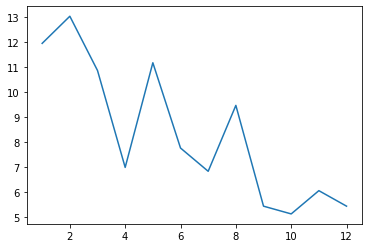

In [8]:
(df[df['league_name']=='Italian Serie A']['month'].value_counts(normalize=True)*100).sort_index().plot()

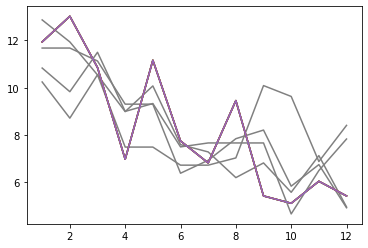

In [9]:
for league in leagues:
  (df[df['league_name']==league]['month'].value_counts(normalize=True)*100).sort_index().plot(color = 'gray')
  (df[df['league_name']=='Italian Serie A']['month'].value_counts(normalize=True)*100).sort_index().plot()

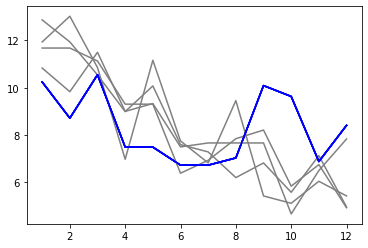

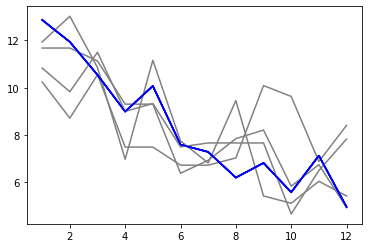

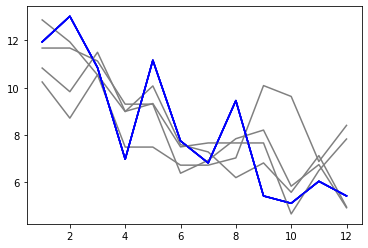

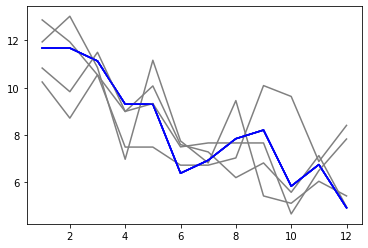

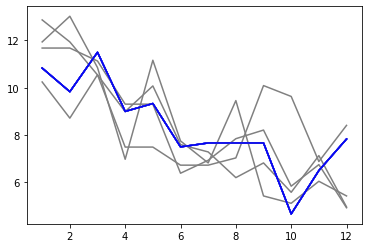

In [10]:
for league in leagues:
  fig, ax = plt.subplots(nrows=1, ncols=1)
  for league2 in leagues:
    (df[df['league_name']==league2]['month'].value_counts(normalize=True)*100).sort_index().plot(color = 'gray')
    (df[df['league_name']==league]['month'].value_counts(normalize=True)*100).sort_index().plot(color = 'blue')

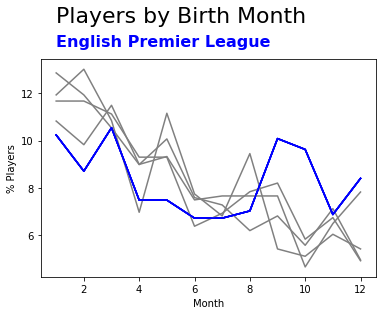

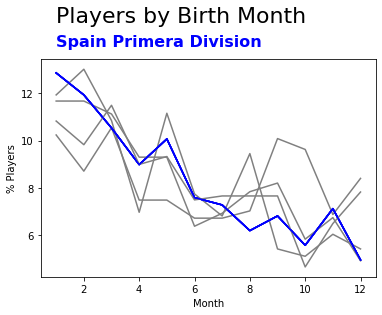

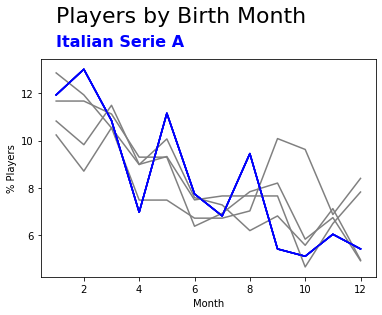

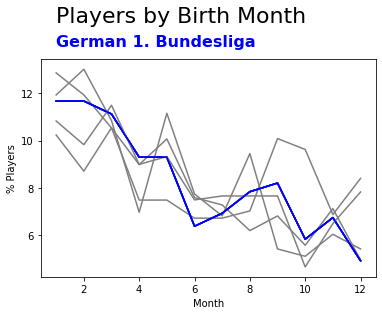

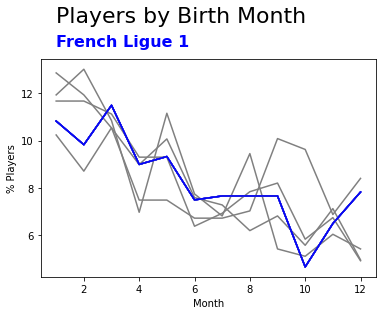

In [11]:
for league in leagues:
  fig, ax = plt.subplots(nrows=1, ncols=1)
  for league2 in leagues:
    (df[df['league_name']==league2]['month'].value_counts(normalize=True)*100).sort_index().plot(color = 'gray')
    (df[df['league_name']==league]['month'].value_counts(normalize=True)*100).sort_index().plot(color = 'blue')
  plt.text(1,15,'Players by Birth Month', fontsize=22, fontweight=300)
  plt.text(1,14,league, fontsize=16, color='blue', fontweight=600)
  plt.xlabel('Month')
  plt.ylabel('% Players')

In [12]:
def return_random_hex():
  r = lambda: random.randint(0,255)
  return('#%02X%02X%02X' % (r(),r(),r()))

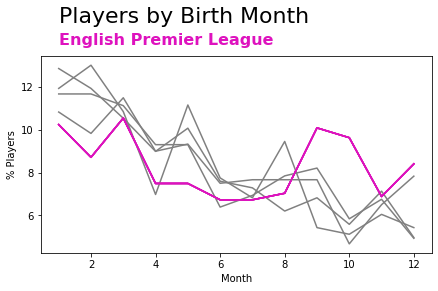

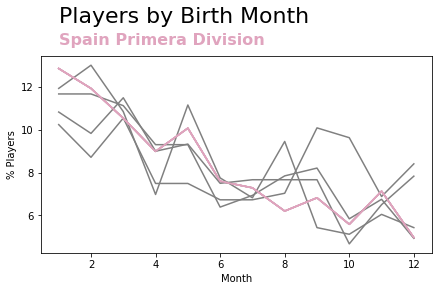

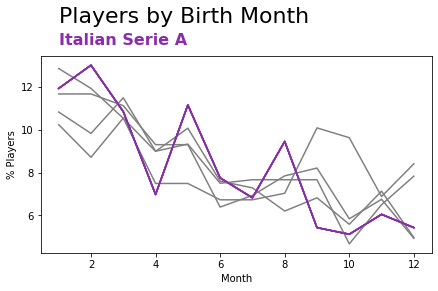

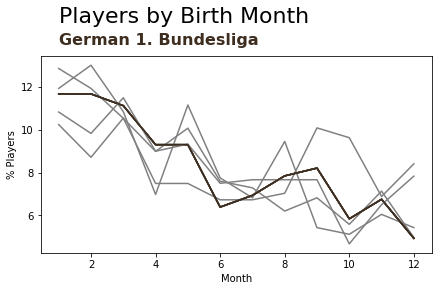

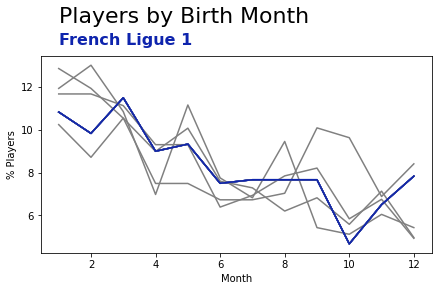

In [13]:
for league in leagues:
  fig, ax = plt.subplots(nrows=1, ncols=1)
  col = return_random_hex()
  for league2 in leagues:
    (df[df['league_name']==league2]['month'].value_counts(normalize=True)*100).sort_index().plot(color = 'gray')
    (df[df['league_name']==league]['month'].value_counts(normalize=True)*100).sort_index().plot(color = col)
  plt.text(1,15,'Players by Birth Month', fontsize=22, fontweight=300)
  plt.text(1,14,league, fontsize=16, color=col, fontweight=600)
  plt.tight_layout()
  plt.xlabel('Month')
  plt.ylabel('% Players')

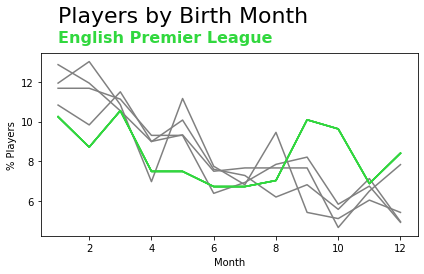

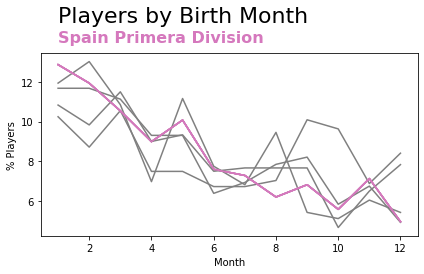

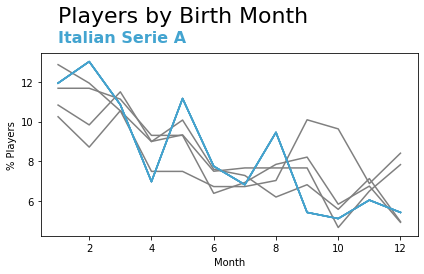

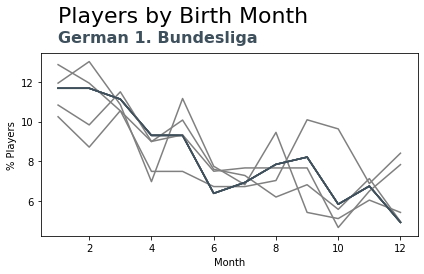

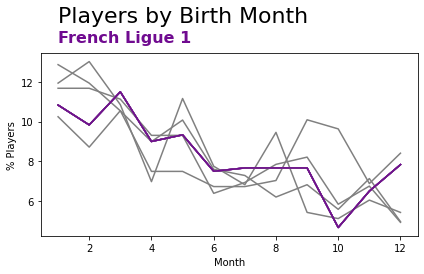

In [19]:
for index,league in enumerate(leagues):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    col = return_random_hex()
    for league2 in leagues:
        (df[df['league_name']==league2]['month'].value_counts(normalize=True)*100).sort_index().plot(color = 'gray')
        (df[df['league_name']==league]['month'].value_counts(normalize=True)*100).sort_index().plot(color = col)
    plt.text(1,15,'Players by Birth Month', fontsize=22, fontweight=300)
    plt.text(1,14,league, fontsize=16, color=col, fontweight=600)
    plt.xlabel('Month')
    plt.ylabel('% Players')
    plt.tight_layout()
    plt.savefig('../figures/' + str(index) + '.png')

In [21]:
with imageio.get_writer('../figures/mygif.gif', mode='I') as writer:
  for index in range(0,4):
     for i in range(0,6):
        image = imageio.imread('../figures/' + str(index) + '.png')
        writer.append_data(image)